In [23]:
import wntr

In [24]:
import wntr
import pandas as pd

inp_file = 'single_pipe_leak.inp'
emitter_coeffs = [0, 0.001]
results_list = []
flow_list = []

for coeff in emitter_coeffs:
    wn = wntr.network.WaterNetworkModel(inp_file)
    junction = wn.get_node('JUNCTION-0')
    junction.emitter_coefficient = coeff

    sim = wntr.sim.EpanetSimulator(wn)
    results = sim.run_sim()

    head = results.node['head'].iloc[0]
    pressure = results.node['pressure'].iloc[0]
    demand = results.node['demand'].iloc[0]
    
    print(50 - pressure['JUNCTION-0'])


    df = pd.DataFrame({
        'Emitter Coefficient': coeff,
        'Head (m)': head,
        'Pressure (m)': pressure,
        'Demand (m³/s)': demand,
    })

    results_list.append(df)
    
    flow = results.link['flowrate'].iloc[0]  # Take the flowrate at first time step
    flow_df = pd.DataFrame({
        'Emitter Coefficient': coeff,
        'Pipe': flow.index,
        'Flowrate (m³/s)': flow.values
    })

    flow_list.append(flow_df)

final_results = pd.concat(results_list, keys=emitter_coeffs, names=["Leak Scenario", "Element"])
pipe_flows = pd.concat(flow_list, ignore_index=True)
display(final_results)
display(pipe_flows)


0.009857177734375
0.012592315673828125


Emitter Coefficient   Head (m)  Pressure (m)  \
Leak Scenario Element                                                    
0.000         JUNCTION-0                0.000  49.990143  4.999014e+01   
              JUNCTION-1                0.000  49.970432  4.997043e+01   
              RESERVOIR                 0.000  50.000000 -7.812500e-07   
0.001         JUNCTION-0                0.001  49.987408  4.998741e+01   
              JUNCTION-1                0.001  49.967693  4.996769e+01   
              RESERVOIR                 0.001  50.000000 -7.812500e-07   

                          Demand (m³/s)  
Leak Scenario Element                    
0.000         JUNCTION-0        0.00000  
              JUNCTION-1        0.05000  
              RESERVOIR        -0.05000  
0.001         JUNCTION-0        0.00707  
              JUNCTION-1        0.05000  
              RESERVOIR        -0.05707

,Emitter Coefficient,Pipe,Flowrate (m³/s)
0,0.000,PIPE-0,0.05000
1,0.000,PIPE-1,0.05000
2,0.001,PIPE-0,0.05707
3,0.001,PIPE-1,0.05000


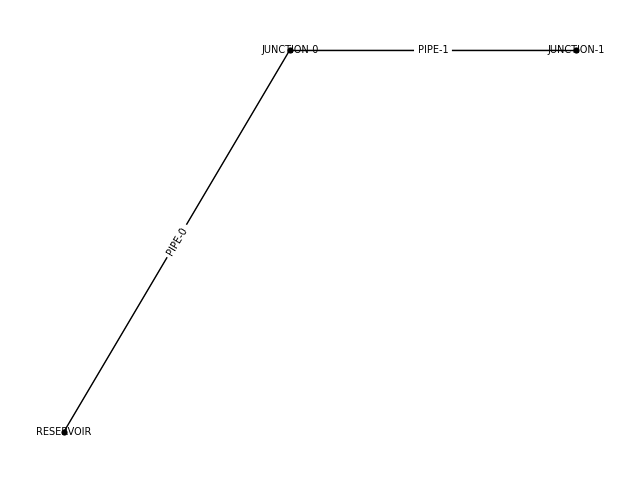

In [25]:
from wntr.graphics import plot_network
import matplotlib.pyplot as plt

# Plot just the structure of the network
fig, ax = plt.subplots(figsize=(8, 6))
plot_network(wn, node_labels=True, link_labels=True, ax=ax)
plt.show()